In [1]:
import random, pathlib, time, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from util import filter_all_ds, mean_ds

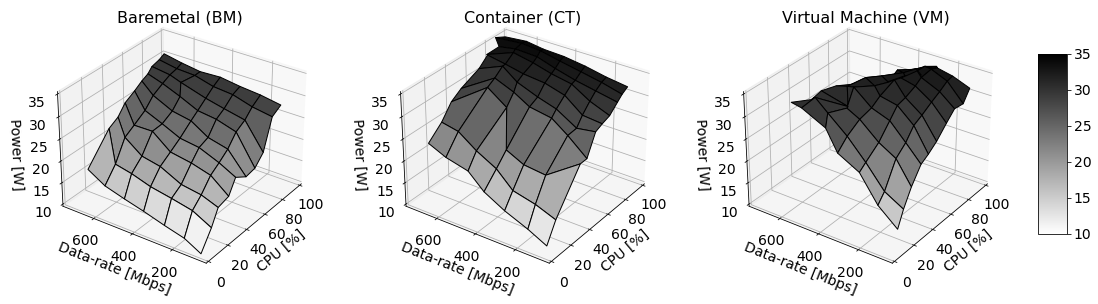

In [2]:
fig = plt.figure( figsize=(20,5) )
title_size = 16
labelsize  = 14
zlim = [10,35]
cmap = 'binary'
dsnames = ['nucBM_dataset.pickle','nucCT_dataset.pickle', 'nucVM_dataset.pickle']
labels  = ['Baremetal (BM)','Container (CT)','Virtual Machine (VM)']
for i in range(len(dsnames)):
    ax   = fig.add_subplot( 1,3,i+1 , projection='3d' )

    ds = pd.read_pickle(dsnames[i])
    ds = filter_all_ds( ds )
    ds = mean_ds( ds )

    surf = ax.plot_surface(  ds.values[:,1].reshape((10,-1) ) , 
                        ds.values[:,2].reshape((10,-1) )  , 
                        ds.values[:,0].reshape((10,-1) )/1000  , linewidth=1, antialiased=True, cmap=cmap, vmin=zlim[0], vmax=zlim[1], edgecolor='black')

    ax.view_init(elev=30, azim=225-10)
    ax.set_zlim(zlim)#,ax.set_zlim([10000,35000]),
    ax.set_xlim([0,100]), ax.set_ylim([50,750])
    ax.set_xlabel('CPU [%]', fontsize=labelsize), ax.set_ylabel('Data-rate [Mbps]', fontsize=labelsize) , ax.set_zlabel('Power [W]', fontsize=labelsize)
    ax.set_title( labels[i], fontsize=title_size, y=1)
    ax.tick_params(axis='both', which='major', labelsize=labelsize)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.25, 0.02, 0.5])
cb = fig.colorbar(surf, cax=cbar_ax , shrink=0.04, aspect=10 )
for t in cb.ax.get_yticklabels():
    t.set_fontsize(labelsize)